## Importing Modules

In [1]:
import matplotlib as mpl
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

## Axes Settings

<IPython.core.display.Javascript object>


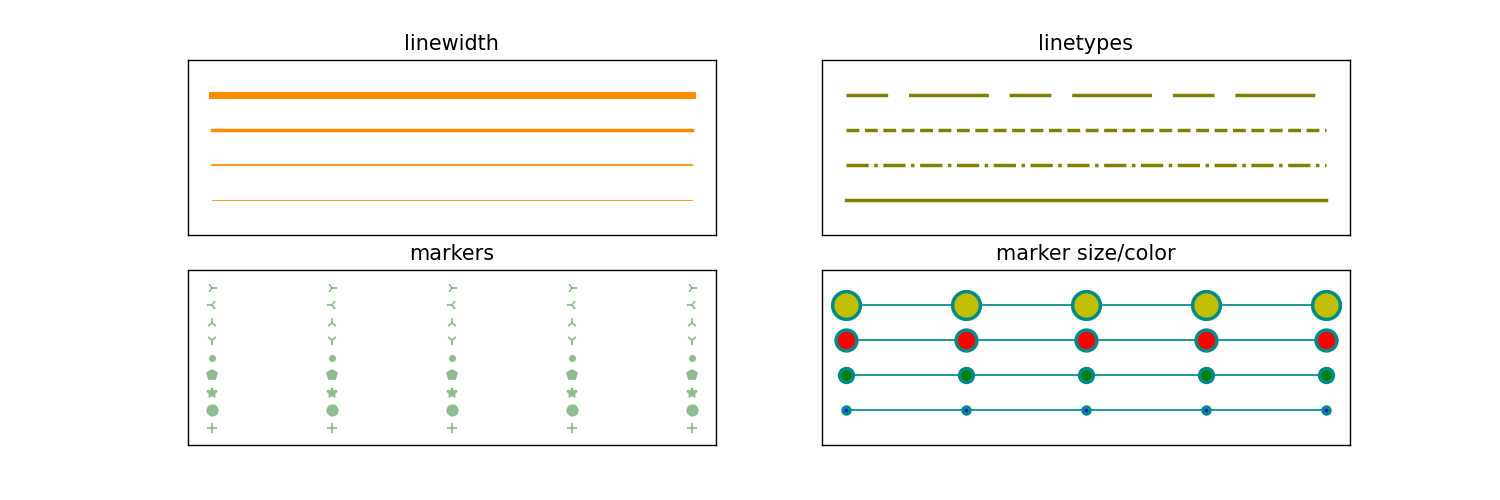

In [2]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x)

def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax+1)
    ax.set_title(title)
    
fig, axes = plt.subplots(2, 2, figsize=(12, 4))

#linewidth
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
    axes[0, 0].plot(x, y + n, color="darkorange", linewidth=linewidth)
axes_settings(fig, axes[0, 0], "linewidth", len(linewidths))  

#line types
linestyles = ['-', '-.', '--']
for n, linestyle in enumerate(linestyles):
    axes[0, 1].plot(x, y + n, color="olive", lw=2, linestyle=linestyle)
line, = axes[0, 1].plot(x, y+3, color="olive", lw=2)
lenght1, gap1, length2, gap2 = 12, 6, 23, 6
line.set_dashes([lenght1, gap1, length2, gap2])
axes_settings(fig, axes[0, 1], "linetypes", len(linestyles) + 1) 

#marker types
markers = ['+', 'o', '*', 'p', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
    axes[1, 0].plot(x, y + n, color="darkseagreen", lw=2, ls='', marker=marker)
axes_settings(fig, axes[1, 0], "markers", len(markers))

#marker size and color
markersizecolors = [(4, "b"), (8, "g"), (12, "r"), (16, "y")]
for n, (markersize, markerfacecolor) in enumerate(markersizecolors):
    axes[1, 1].plot(x, y + n, color="darkcyan", lw=1, ls='-', marker='o',
                markersize=markersize, markerfacecolor=markerfacecolor,
                markeredgewidth=2)
axes_settings(fig, axes[1, 1], "marker size/color", len(markersizecolors))    

## Visualization of Fourier series of tangent

<IPython.core.display.Javascript object>


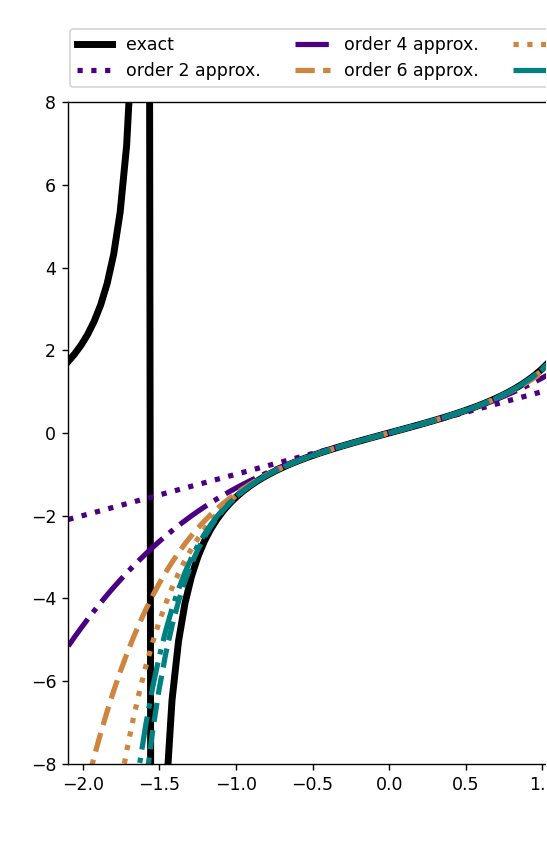

In [3]:
sym_x = sp.Symbol("x")
x = np.linspace(-2/3 * np.pi, 2/3 * np.pi, 100)
def tan_expansion(x, n):
    return sp.lambdify(sym_x, sp.tan(sym_x).series(n=n+1).removeO())(x) #remove 0 deletes the last residual part. 
fig, ax = plt.subplots()
ax.plot(x, np.tan(x), linewidth=4, color="black", label='exact')

colors = ["indigo", "peru", "teal"]
linestyles = [':', '-.', '--']
for i, n in enumerate(range(1, 12, 2)):
    ax.plot(x, tan_expansion(x, n), color=colors[i // 2], 
            linestyle=linestyles[i % 3], linewidth=3,
            label="order %d approx." % (n+1))

ax.set_ylim(-8, 8)
ax.set_xlim(-2/3*np.pi, 2/3*np.pi)

ax.legend(ncol=4, bbox_to_anchor=(0, 1.02), loc=3, borderaxespad=0.1)
fig.subplots_adjust(right=1.3)
fig.set_size_inches(3.5, 5.5)